In [3]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPool2D
from keras.utils import np_utils
from keras.utils import plot_model as plot

In [4]:
# Image size
img_rows,img_cols = 28,28

# 过滤器数量
nb_filters = 32

# Pooling
pool_size = (2,2)

# kernel
kernel_size = (3,3)

In [9]:
# Prepare dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = 10
Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

In [13]:
# CNN
model = Sequential()
model.add(Convolution2D(nb_filters,kernel_size[0],kernel_size[1],border_mode='valid',
                       input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters,kernel_size[0],kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=pool_size))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

# Compilation
model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., padding="valid")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  


In [16]:
# Training
batch_size = 32
nb_epoch = 1
model.fit(X_train,Y_train,batch_size=batch_size,nb_epoch=nb_epoch,verbose=1,validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 155s - loss: 0.2692 - acc: 0.9183 - val_loss: 0.0739 - val_acc: 0.9764


In [17]:
# Evaluation 
score = model.evaluate(X_test,Y_test,verbose=0)
print("Test Metrics:",list(zip(model.metrics_names,score)))
plot(model,to_file='s7.png',show_shapes=True)

Test Metrics: [('loss', 0.073865828168112782), ('acc', 0.97640000000000005)]


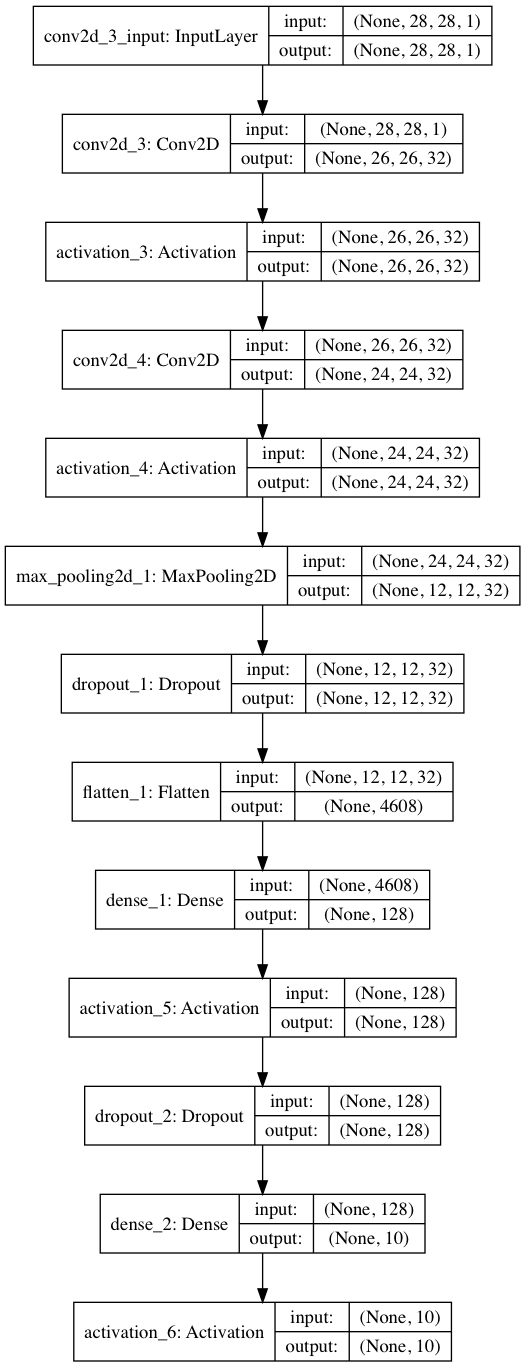

In [18]:
from IPython.display import Image
Image(filename='s7.png')